# Demonstration of how to use CellSegmentationTracker


In this code, it will be demonstrated how to use CellSegmentationTracker and its methods. If you like, you can use the sample data file epi2500.tif, which you can download from https://github.com/simonguld/CellSegmentationTracker/blob/main/resources/epi2500.tif. 

In this folder, you can also find the xml file generated by running the segmentation and tracking as well as the spots, tracks and edges csv files generated by CellSegmentationTracker.

In [1]:
import os
from cellsegmentationtracker import CellSegmentationTracker


In the following, we will walk through the class parameters one by one and finally initialize an instance of CellSegmentationTracker:

In [2]:
## Set paths to executables:
#  If you want to do segmentation and tracking, you need to provide paths to ImageJ and Cellpose. 
# If you already have an xml file and just want to use CellSegmentationTracker to generate csv files, 
# calculate velocities or analyse the results, you don't have to provide these
cellpose_python_filepath = 'C:\\Users\\Simon Andersen\\miniconda3\\envs\\cellpose\\python.exe'
imj_path = "C:\\Users\\Simon Andersen\\Fiji.app\\ImageJ-win64.exe"

# Set path to .tif image file (or folder with images). If you already have an xml file, 
# you don't have to provide it
image_path = "C:\\Users\\Simon Andersen\\Projects\\Projects\\CellSegmentationTracker\\resources\\epi2500.tif"

# If you have already done segmentation and tracking, you can simply provide the path to the xml file.
xml_path = None 

# Set path to output folder. If None, results will be outputted in the same folder as the image.
output_folder_path = None

# Set whether to use a pretrained model or not. If not, you need to provide the path to a custom model
use_model = 'EPI2500'
custom_model_path = None

# Set whether to open Fiji and show the segmentation and tracking results. 
# If you choose to show the results, you must close the window before the program can continue
show_segmentation = True
# Set cellpose and trackmate settings. If you don't provide any, the default settings will be used
cellpose_dict = {
          'TARGET_CHANNEL' : 0,
          'OPTIONAL_CHANNEL_2': 0,
          'FLOW_THRESHOLD': 0.4,
          'CELLPROB_THRESHOLD': 0.5,
          'CELL_DIAMETER': 0.0, # If 0.0, the diameter will be estimated by Cellpose
          'USE_GPU': False,
          'SIMPLIFY_CONTOURS': True
          }
# Beware that if you set ALLOW_TRACK_SPLITTING and/or ALLOW_TRACK_MERGING to True, 
# the calculated velocities might be incorrect, as several cells will be merged into
#  one track and can be present at the same time
trackmate_dict = {'LINKING_MAX_DISTANCE': 15.0,
                                        'GAP_CLOSING_MAX_DISTANCE': 15.0,
                                        'MAX_FRAME_GAP': 2,
                                        'ALLOW_TRACK_SPLITTING': False, 
                                        'ALLOW_TRACK_MERGING': False,
            }


# Now having set all parameters, we are ready to initialise the CellSegmentationTracker object
cst = CellSegmentationTracker(imagej_filepath = imj_path, \
    cellpose_python_filepath = cellpose_python_filepath, image_folder_path = image_path, \
      xml_path = xml_path, output_folder_path = output_folder_path,\
      use_model = use_model, custom_model_path = custom_model_path,\
      show_segmentation = show_segmentation, cellpose_dict = dict(), trackmate_dict = dict(),)



To run the segmentation and tracking, simply call the run_segmentation_tracking() method. 

In [3]:
# If you are using the epi500 sample images (without GPU), it will take 5-6 minutes to run.callable
# If you are showing the results, you must close the window before the program can continue
cst.run_segmentation_tracking()

In [4]:
# After the segmentation and tracking is done, you can generate csv files with the results
#  by calling the generate_csv_files() method

# Spot features will be extracted automatically. Decide whether to calculate cell velocities, 
# as well as track and edge features. By default, everything is extracted and saved
calculate_velocities = True
get_tracks = True
get_edges = True

# If you want to save the csv files, set save_csv_files to True 
# and provide a name for the csv files. If None, the name will be the same as the image name.
# The file(s) will be saved in the output folder if provided, 
# otherwise in the same folder as the image if provided, otherwise in the current working directory
cst.generate_csv_files(calculate_velocities = calculate_velocities, get_tracks = get_tracks, \
    get_edges = get_edges, save_csv_files = True, name = None)

# Now, you can access the spots, tracks and edges dataframes as follows:
# The final two columns of the spots object are the velocities (if calculated) in the x and y direction
df_spots, df_tracks, df_edges = cst.spots_df, cst.tracks_df, cst.edges_df

df_spots.info()


Starting to generate csv files from xml file now. This may take a while...                   
Processing an XML file with 120.000 spots, 90.000 edges and 20.000 tracks takes about 6-7 minutes to process on a regular laptop.

Saved spots csv file to:  C:\Users\Simon Andersen\Projects\Projects\CellSegmentationTracker\resources\epi2500_spots.csv
Saved tracks csv file to:  C:\Users\Simon Andersen\Projects\Projects\CellSegmentationTracker\resources\epi2500_tracks.csv
Saved edges csv file to:  C:\Users\Simon Andersen\Projects\Projects\CellSegmentationTracker\resources\epi2500_edges.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11280 entries, 0 to 11279
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Frame                   11280 non-null  float64
 1   T                       11280 non-null  float64
 2   X                       11280 non-null  float64
 3   Y                       11280 non

In [5]:
# To get basic settings and information about the segmentation and tracking, call the print_settings() method
cst.print_settings()


Image information:  ['filename: epi2500.tif', 'folder: C:\\Users\\Simon Andersen\\Projects\\Projects\\CellSegmentationTracker\\resources\\', 'width: 2005', 'height: 1567', 'nslices: 1', 'nframes: 4', 'pixelwidth: 1.0', 'pixelheight: 1.0', 'voxeldepth: 1.0', 'timeinterval: 1.0', 'xstart: 0', 'xend: 2004', 'ystart: 0', 'yend: 1566', 'zstart: 0', 'zend: 0', 'tstart: 0', 'tend: 3']
Cellpose settings:  {'TARGET_CHANNEL': 0, 'OPTIONAL_CHANNEL_2': 0, 'CELLPOSE_PYTHON_FILEPATH': 'C:\\Users\\Simon Andersen\\miniconda3\\envs\\cellpose\\python.exe', 'CELLPOSE_MODEL': 'EPI2500', 'CELL_DIAMETER': 0.0, 'USE_GPU': False, 'SIMPLIFY_CONTOURS': True, 'CELLPOSE_MODEL_FILEPATH': 'C:\\Users\\Simon Andersen\\Projects\\Projects\\CellSegmentationTracker\\models\\epi2500', 'FLOW_THRESHOLD': 0.6, 'CELLPROB_THRESHOLD': -1}
Trackmate settings:  {'LINKING_MAX_DISTANCE': 15.0, 'GAP_CLOSING_MAX_DISTANCE': 15.0, 'MAX_FRAME_GAP': 2, 'ALLOW_TRACK_SPLITTING': False, 'ALLOW_TRACK_MERGING': False} 



In [6]:
# You can get average values of observables for spot, track and edges observables by calling
cst.get_summary_statistics()

    


SUMMARY STATISTICS FOR SPOTS: 
All lengths are in phyiscal units, if provided. Otherwise, they are in pixels.
All times are in physical units, if provided. Otherwise, they are in frames.

Total no. of spots:  11280
Average no. of spots per frame:  2820.0
Average value of T: 1.657  ± 0.000
Average value of X: 1016.491  ± 0.049
Average value of Y: 801.859  ± 0.039
Average value of Radius: 17.831  ± 0.000
Average value of Visibility: 1.000  ± 0.000
Average value of Ellipse short axis: 15.505  ± 0.000
Average value of Ellipse long axis: 22.486  ± 0.000
Average value of Ellipse angle: 0.892  ± 0.000
Average value of Ellipse aspect ratio: 1.480  ± 0.000
Average value of Area: 1036.210  ± 0.035
Average value of Perimeter: 128.606  ± 0.002
Average value of Circularity: 0.765  ± 0.000
Average value of Solidity: 0.944  ± 0.000
Average value of Quality: 1036.595  ± 0.035
Average value of Mean intensity ch1: 532.423  ± 0.003
Average value of Median intensity ch1: 527.365  ± 0.004
Average value of

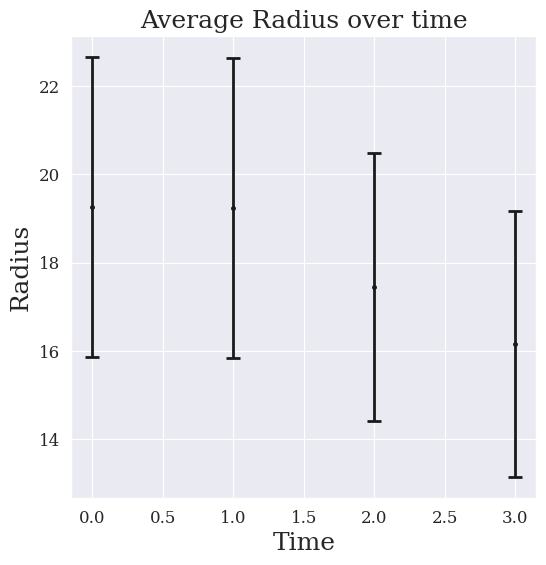

Spot features:  Index(['Frame', 'T', 'X', 'Y', 'Z', 'Radius', 'Visibility',
       'Manual spot color', 'Ellipse center x0', 'Ellipse center y0',
       'Ellipse short axis', 'Ellipse long axis', 'Ellipse angle',
       'Ellipse aspect ratio', 'Area', 'Perimeter', 'Circularity', 'Solidity',
       'Shape index', 'Quality', 'Mean intensity ch1', 'Median intensity ch1',
       'Min intensity ch1', 'Max intensity ch1', 'Sum intensity ch1',
       'Std intensity ch1', 'Contrast ch1', 'Signal/Noise ratio ch1',
       'Spot ID', 'TRACK_ID', 'Velocity_X', 'Velocity_Y'],
      dtype='object')
Track features:  Index(['TRACK_INDEX', 'TRACK_ID', 'NUMBER_SPOTS', 'NUMBER_GAPS',
       'NUMBER_SPLITS', 'NUMBER_MERGES', 'NUMBER_COMPLEX', 'LONGEST_GAP',
       'TRACK_DURATION', 'TRACK_START', 'TRACK_STOP', 'TRACK_DISPLACEMENT',
       'TRACK_X_LOCATION', 'TRACK_Y_LOCATION', 'TRACK_Z_LOCATION',
       'TRACK_MEAN_SPEED', 'TRACK_MAX_SPEED', 'TRACK_MIN_SPEED',
       'TRACK_MEDIAN_SPEED', 'TRACK_STD_SPEE

In [7]:
# To plot any spot feature over time, call the plot_feature_over_time() method. 
# Make sure to provide the name of the feature as it appears in the df_spots dataframe.

cst.plot_feature_over_time('Radius')

# You can print all spot, track and edges feature names by calling
cst.get_feature_keys()

In [8]:
# To calculate things like velocity and density fields, you need to first call the 
#calculate_grid_statistics() method. This will calculate the average value of all chosen
# spot features in a grid of cells. 'Frame', 'X', 'Y', 'T', 'Velocity_X', 'Velocity_Y' are
# automatically included, and you can choose to include any additional spot features.

# Ngrid is number of grid squares in the smallest dimension. \
#The number of grid squares in the other dimension is determined by the aspect ratio of 
#the image, with the restriction that the grid squares are square.
Ngrid = 10
# Choose any additional spot features to include in the grid statistics(must be in df_spots)
include_features = ['Area']
# Choose whether to calculate absolute cell counts or densities for each grid
return_absolute_cell_counts = True

# The csv file is saved by default. 
cst.calculate_grid_statistics(Ngrid = Ngrid, include_features=include_features, \
    return_absolute_cell_counts=return_absolute_cell_counts, save_csv=True)

,Frame,T,Ngrid,x_center,y_center,number_density,mean_velocity_X,mean_velocity_Y,mean_area
0,0.0,0.0,0.0,150.589914,1482.430936,16.0,-2.747485,2.524772,1458.750000
1,0.0,0.0,1.0,303.795792,1482.430936,18.0,-2.711498,2.732689,1161.027778
2,0.0,0.0,2.0,457.001670,1482.430936,18.0,-2.506308,1.897111,1042.277778
3,0.0,0.0,3.0,610.207549,1482.430936,18.0,-2.592122,1.865812,1412.055556
4,0.0,0.0,4.0,763.413427,1482.430936,21.0,-2.307591,1.665393,944.190476
...,...,...,...,...,...,...,...,...,...
475,3.0,3.0,115.0,1223.031062,103.578032,29.0,2.087995,1.520630,811.706897
476,3.0,3.0,116.0,1376.236940,103.578032,26.0,-2.104940,2.231076,800.653846
477,3.0,3.0,117.0,1529.442818,103.578032,26.0,1.924035,-0.108720,886.461538
478,3.0,3.0,118.0,1682.648697,103.578032,19.0,2.731029,3.672966,1058.578947


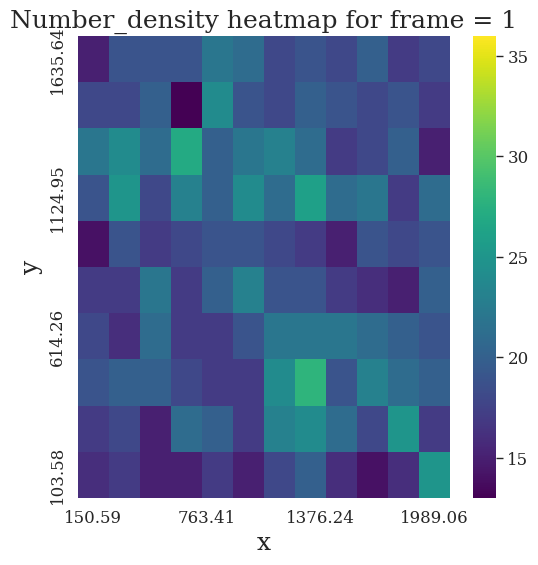

In [9]:
## Now that we have calculated the grid statistics, we can plot them.
# To plot scalar fields, call the visualize_grid_statistics() method.

# Choose which feature to plot. If None, number_density will be plotted
# NB: If you choose another feature than number_density, you must have
# included it in the grid statistics calculation
feature = 'number_density'

# Choose which frames to plot. If [0,0], all frames will be plotted
frame_range = [1,2] # left inclusive, right exclusive

# Choose whether to calculate the average over the entire frame range
calculate_average = False

# Choose whether to animate the plot (doesn't work in jupyter notebook)
animate = False
# Choose the frame interval for the animation)
frame_interval = 800
# Choose whether to show the plot
show = True

cst.visualize_grid_statistics(feature = feature, frame_range = frame_range, \
    calculate_average = calculate_average, animate = animate, \
    frame_interval = frame_interval, show = show)


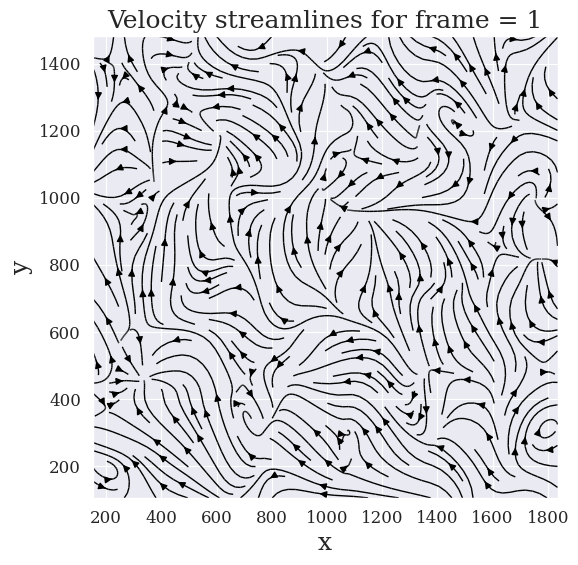

In [10]:
# Finally, to plot the velocity flow field or streamlines, call the plot_velocity_field() method.

# Choose whether to plot the velocity flow field or streamlines
mode = 'streamlines' # 'streamlines' or 'field'

# All the remaining arguments are the same as for visualize_grid_statistics()


cst.plot_velocity_field(mode = 'streamlines', frame_range = frame_range, \
    calculate_average = calculate_average, animate = animate, \
    frame_interval = frame_interval, show = show)

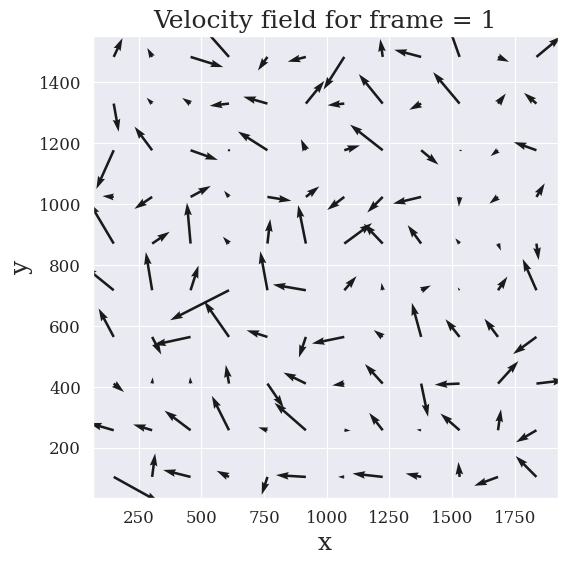

In [11]:
# For good measure, let us also plot the velocity flow field for frame 1
cst.plot_velocity_field(mode = 'field', frame_range = frame_range, \
    calculate_average = calculate_average, animate = animate, \
    frame_interval = frame_interval, show = show)

Coming soon:
- Automatic conversion to physical units
- Density fluctuation function

... and much more!